<a href="https://colab.research.google.com/github/alaaguedda/python-Colab-Trainer/blob/main/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list  # To check popular datasets
!kaggle datasets download -d <dataset-id>


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!pip install -q kaggle


In [ ]:
!kaggle datasets list


In [8]:
!kaggle datasets download -d adilshamim8/salaries-for-data-science-jobs

Dataset URL: https://www.kaggle.com/datasets/adilshamim8/salaries-for-data-science-jobs
License(s): DbCL-1.0
  0% 0.00/2.29M [00:00<?, ?B/s]
100% 2.29M/2.29M [00:00<00:00, 179MB/s]


In [9]:
!unzip salaries-for-data-science-jobs.zip

Archive:  salaries-for-data-science-jobs.zip
  inflating: salaries.csv            
  inflating: salaries.json           


In [ ]:
df = pd.read_csv("salaries.csv")  # Use the actual file name if different
df.head()

In [ ]:
df_clean = df.dropna(subset= ['job_title'])

job_counts = df_clean['job_title'].value_counts()
top5 = job_counts[:7]
others = job_counts[7:].sum()

final_counts = pd.concat([top5 , pd.Series({'Others':others})])

plt.figure(figsize=(8, 8))
def label_inside(pct, allvals):
    absolute = int(round(pct/100 * sum(allvals)))
    index = list(final_counts.values).index(absolute)
    return f"{final_counts.index[index]}\n{pct:.1f}%"

plt.pie(
    final_counts,
    labels=None,
    autopct=lambda pct: label_inside(pct, final_counts),
    startangle=140,
    textprops={'fontsize': 9}
)
plt.title("Top 5 Job Titles vs Others (Name + % Inside)")

plt.axis("equal")
plt.show()

In [ ]:
top5_saleries = df.sort_values(by='salary_in_usd', ascending =False)
top5_saleries[['job_title','company_location','salary_in_usd']].head(10)

In [ ]:
df_exp = df.groupby('experience_level')['salary_in_usd'].mean()
df_exp.sort_values()

In [ ]:
df_exp_job = df['experience_level'].value_counts().sort_index()

df_exp_job.plot(kind = 'bar')
plt.title('job titles for experiance')
plt.xlabel('expeciance level')
plt.ylabel('job')
plt.grid(axis='y')
plt.show()

In [76]:
bins = [0, 10000, 30000, 50000, 70000, 90000, 120000, 150000, 200000, 250000, 300000, 350000, float('inf')]

# Define readable labels for those ranges
labels = [
    '<10k', '10k-30k', '30k-50k', '50k-70k', '70k-90k', '90k-120k', '120k-150k',
    '150k-200k', '200k-250k', '250k-300k', '300k-350k', '>350k'
]

df['salary_range'] = pd.cut(df['salary_in_usd'] , bins=bins ,labels = labels ,right= False)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_range
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M,70k-90k
1,2025,EN,FT,Data Quality Analyst,48000,GBP,60759,GB,0,GB,M,50k-70k
2,2025,SE,FT,Applied Scientist,266000,USD,266000,US,0,US,M,250k-300k
3,2025,SE,FT,Applied Scientist,204000,USD,204000,US,0,US,M,200k-250k
4,2025,SE,FT,Data Scientist,291000,USD,291000,US,0,US,M,250k-300k
...,...,...,...,...,...,...,...,...,...,...,...,...
141561,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,>350k
141562,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,150k-200k
141563,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,90k-120k
141564,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,90k-120k


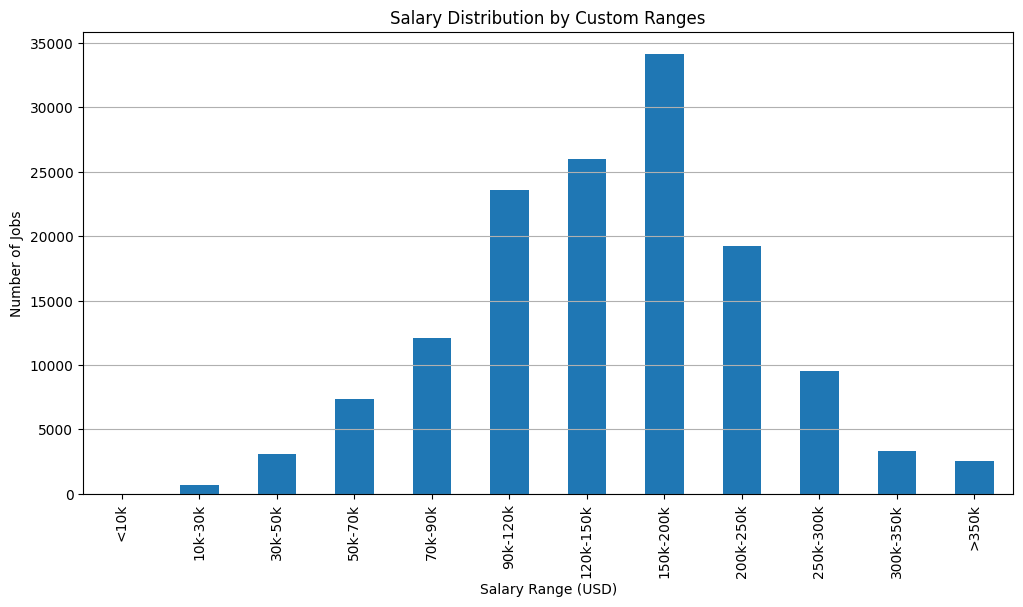

In [82]:
salary_count = df['salary_range'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
salary_count.plot(kind='bar')
plt.title('Salary Distribution by Custom Ranges')
plt.xlabel('Salary Range (USD)')
plt.ylabel('Number of Jobs')
plt.grid(axis='y')
plt.show()